#CI7250 Machine Learning and Artificial Intelligence

##Assignment 1


---


Group 11 Members:
*    Erika Coke - K2112049
*    Ladan Saeidi - K2145352
*    Çiğdem Şahin - K2058962

##**PART III** – Application: Classification (Group Submission)

In [ ]:
# Import Related Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn import svm
from sklearn.svm import SVC, NuSVC, LinearSVC
from time import time
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


%matplotlib inline

In [ ]:
# Loading data
data =  datasets.load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Pre-Processing

### Feature Scaling
The dataset is unbalanced (i.e.some of the features have values in 1e-2, others are 1e+2), so we will apply feature scaling to ensure the larger features don't overshadown the smaller features when we conduct our testing methods 

### Standardization- StandardScaler 

In [ ]:
# features have a mean of 0 and standard deviation of 1
scaler_sd=StandardScaler()
#Fit on training set only 
scaler_sd.fit(X_train)
#Apply transform to both the training set and test set 
X_train_sc=scaler_sd.transform(X_train)
X_test_sc=scaler_sd.transform(X_test)

### Normalization-MinMax Scaler

In [ ]:
scaler_range = MinMaxScaler()
#Fit on training set only 
scaler_range.fit(X_train)
#Apply transform to both the training set and test set 
X_train_mm=scaler_range.transform(X_train)
X_test_mm=scaler_range.transform(X_test)


### PCA with normalized Data [1]


In [ ]:
# 99% of variance
#Make an instance of the Model
# use thisnumber for plotting
pca1=PCA(.99)
pca1.fit(X_train_sc)
print( "the number of components: ",pca1.n_components_ )

pca2=PCA(.95)
pca2.fit(X_train_sc)
print( "the number of components: ",pca2.n_components_ )
##################PCA with min_max scaling
# 99% of variance
#Make an instance of the Model
pca_mm=PCA(.99)
pca_mm.fit(X_train_mm)
print( "the number of components: ",pca_mm.n_components_ )

# use this instance through the code
pca = PCA(0.99)
df_train_pca = pca.fit_transform(X_train_sc)
# Apply PCA model to the test data
df_test_pca = pca.transform(X_test_sc)
# pca with min_max scaling
X_train_mm_pca= pca_mm.transform(X_train_mm)
X_test_mm_pca= pca_mm.transform(X_test_mm)

the number of components:  17
the number of components:  10
the number of components:  16


### Plot the PCA[2]

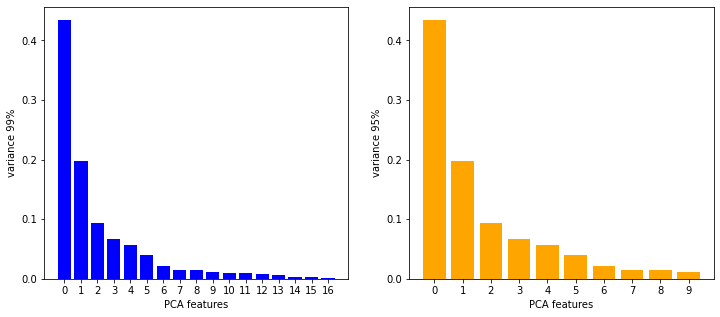

In [ ]:
pca_without_std = pca.explained_variance_ratio_
#Cumulative sum of pca explained variance greater than 1
# PCA with data standardization
pca_with_std = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
features1=range(pca1.n_components_)
features2=range(pca2.n_components_)
features3=range(pca_mm.n_components_)
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.bar(features1,pca1.explained_variance_ratio_,color="blue")  
plt.xticks(features1)
plt.xlabel("PCA features")
plt.ylabel("variance 99%")
plt.subplot(122)
plt.bar(features2,pca2.explained_variance_ratio_,color="Orange")
plt.xticks(features2)
plt.xlabel("PCA features")
plt.ylabel("variance 95%")
plt.show()


#**Logistic Regression Algorithm**[3] 

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs',random_state =42)
logisticRegr.fit(X_train, y_train)
predictions_lr = logisticRegr.predict(X_test)
acc1_lr = accuracy_score(y_test,predictions_lr)*100
t1_lr = time()
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_lr))
print('\nClassification Report: \n',classification_report(y_test,predictions_lr))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_lr),2))
print("Accuracy: ", round(metrics.accuracy_score(y_test, predictions_lr),2))
y_pred_proba_1 = logisticRegr.predict_proba(X_test)[:, 1]
print("ROC AUC: ", round(roc_auc_score(y_test, y_pred_proba_1),2))


Confusion Matrix: 
 [[45  2]
 [ 4 63]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Balance Accuracy:  0.95
Accuracy:  0.95
ROC AUC:  0.99


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cv = RepeatedKFold(n_splits=10)
logisticRegr_score1 = cross_val_score(logisticRegr, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score1), np.std(logisticRegr_score1)*2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation score: 94.38% (+/- 3.77%)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Logistic Regression Algorithm with PCA

In [ ]:
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs',random_state =42)
logisticRegr.fit(df_train_pca, y_train)
predictions_lr = logisticRegr.predict(df_test_pca)
acc2_lr = accuracy_score(y_test,predictions_lr)*100
t2_lr = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_lr))
print('\nClassification Report: \n', classification_report(y_test,predictions_lr))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_lr),2))
y_pred_proba_2 = logisticRegr.predict_proba(df_test_pca)[:, 1]
print("ROC AUC: ", round(roc_auc_score(y_test, y_pred_proba_2),2))
cv = RepeatedKFold(n_splits=10)
logisticRegr_score2 = cross_val_score(logisticRegr, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score2), np.std(logisticRegr_score2)*2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix: 
 [[45  2]
 [ 2 65]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Balance Accuracy:  0.96
ROC AUC:  0.99


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation score: 94.38% (+/- 3.77%)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


##Logistic Regression Algorithm with scaling data


In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs',random_state =42)
logisticRegr.fit(X_train_sc, y_train)
predictions_lr = logisticRegr.predict(X_test_sc)
acc3_lr = accuracy_score(y_test,predictions_lr)*100
t3_lr = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_lr))
print('\nClassification Report: \n', classification_report(y_test,predictions_lr))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_lr),2))
y_pred_proba_3 = logisticRegr.predict_proba(X_test_sc)[:, 1]
print("ROC AUC: ", round(roc_auc_score(y_test, y_pred_proba_3),2))

logisticRegr_score3 = cross_val_score(logisticRegr, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score3), np.std(logisticRegr_score3)*2))

Confusion Matrix: 
 [[45  2]
 [ 2 65]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Balance Accuracy:  0.96
ROC AUC:  0.99


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation score: 94.38% (+/- 3.77%)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##Logistic Regression Algorithm using min_max scaling


In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs',random_state =42)
logisticRegr.fit(X_train_mm, y_train)
predictions_lr = logisticRegr.predict(X_test_mm)
acc4_lr = accuracy_score(y_test,predictions_lr)*100
t4_lr = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_lr))
print('\nClassification Report: \n', classification_report(y_test,predictions_lr))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_lr),2))
y_pred_proba_4 = logisticRegr.predict_proba(X_test_mm)[:, 1]
print("ROC AUC: ", round(roc_auc_score(y_test, y_pred_proba_4),2))

logisticRegr_score4 = cross_val_score(logisticRegr, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score4), np.std(logisticRegr_score4)*2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix: 
 [[43  4]
 [ 0 67]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Balance Accuracy:  0.96
ROC AUC:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation score: 94.38% (+/- 3.77%)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##Logistic Regression using Min_Max PCA

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs',random_state =42)
logisticRegr.fit(X_train_mm_pca, y_train)
predictions_lr = logisticRegr.predict(X_test_mm_pca)
acc5_lr = accuracy_score(y_test,predictions_lr)*100
t5_lr = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_lr))
print('\nClassification Report: \n', classification_report(y_test,predictions_lr))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_lr),2))
y_pred_proba_5 = logisticRegr.predict_proba(X_test_mm_pca)[:, 1]
print("ROC AUC: ", round(roc_auc_score(y_test, y_pred_proba_5),2))

logisticRegr_score5 = cross_val_score(logisticRegr, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score5), np.std(logisticRegr_score5)*2))

Confusion Matrix: 
 [[43  4]
 [ 0 67]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Balance Accuracy:  0.96
ROC AUC:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation score: 94.38% (+/- 3.77%)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Logistic Regression **using GridSearchCV**


In [ ]:
# We will using GridSearchCV for Logistic Regression to find the best hyperparameters
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: CHyperparameter Optimization With Random Search and Grid Search
#   *    Author: Jason Brownlee
#   *    Date: September 14, 2020
#   *    Availability: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/[4]
#   *
#***************************************************************************************/
# grid search logistic regression model 
# define model
# if we use scaled X the number of FN increase
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# space['C'] = np.logspace(-4, 4, 50)
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_sc,y_train)
t6_lr = time()
# summarize result
print('Best Score: %s' % result.best_score_*100)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score: 0.9802254428341385Best Score

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' 

In [ ]:
# make predictions on test data 
grid_predictions = search.predict(X_test_sc) 

# test_accuracy=accuracy_score(y_test,grid_predictions)*100
# print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )
acc6_lr = accuracy_score(y_test, grid_predictions)*100
# t5_lr = time()
print('Confusion Matrix: \n', confusion_matrix(y_test,  grid_predictions))
print('\nClassification Report: \n', classification_report(y_test, grid_predictions))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test,  grid_predictions),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test,  grid_predictions),2))
y_pred = search.predict_proba(X_test_sc)[:, 1]
print("ROC AUC: ", round(roc_auc_score(y_test, y_pred),2))
logisticRegr_score6 = cross_val_score(logisticRegr, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score6), np.std(logisticRegr_score6)*2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix: 
 [[44  3]
 [ 1 66]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Balance Accuracy:  0.96
Accuracy :  0.96
ROC AUC:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross validation score: 94.38% (+/- 3.77%)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Comparison for Logistic Regression Algorithm

In [ ]:
print("The results for Logistic Regression are  :                      time = {} ,   Accuracy = {} .".format(t1_lr, acc1_lr))
print("The results for Logistic Regression using PCA are  :            time = {} ,  Accuracy = {} .".format(t2_lr, acc2_lr))
print("The results for Logistic Regression using scaling are  :        time = {} ,  Accuracy = {} .".format(t3_lr, acc3_lr))
print("The results for Logistic Regression using Min_max Scaler are  : time = {} ,   Accuracy = {} .".format(t4_lr, acc4_lr))
print("The results for Logistic Regression using PCA Min_max  are  :   time = {} ,   Accuracy = {} .".format(t5_lr, acc5_lr))
print("\nThe results for Logistic Regression using GridSearchCV are  :   time = {} ,  Accuracy = {} .".format(t6_lr, acc6_lr))

The results for Logistic Regression are  :                      time = 1645543172.4205518 ,   Accuracy = 94.73684210526315 .
The results for Logistic Regression using PCA are  :            time = 1645543173.0152287 ,  Accuracy = 96.49122807017544 .
The results for Logistic Regression using scaling are  :        time = 1645543173.9203353 ,  Accuracy = 96.49122807017544 .
The results for Logistic Regression using Min_max Scaler are  : time = 1645543174.4750674 ,   Accuracy = 96.49122807017544 .
The results for Logistic Regression using PCA Min_max  are  :   time = 1645543175.658889 ,   Accuracy = 96.49122807017544 .

The results for Logistic Regression using GridSearchCV are  :   time = 1645543220.9863284 ,  Accuracy = 96.49122807017544 .


## Comparison of Cross validation scores

In [ ]:
print("Cross validation score Logistic Regression :                      {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score1), np.std(logisticRegr_score1)*2))
print("Cross validation score Logistic Regression using PCA:             {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score2), np.std(logisticRegr_score2)*2))
print("Cross validation score Logistic Regression using scaling:         {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score3), np.std(logisticRegr_score3)*2))
print("Cross validation score Logistic Regression using Min_max Scaler:  {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score4), np.std(logisticRegr_score4)*2))
print("Cross validation score Logistic Regression using PCA Min_max:     {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score5), np.std(logisticRegr_score5)*2))
print("Cross validation score Logistic Regression using GridSearchCV:    {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score6), np.std(logisticRegr_score6)*2))

Cross validation score Logistic Regression :                      94.38% (+/- 3.77%)
Cross validation score Logistic Regression using PCA:             94.38% (+/- 3.77%)
Cross validation score Logistic Regression using scaling:         94.38% (+/- 3.77%)
Cross validation score Logistic Regression using Min_max Scaler:  94.38% (+/- 3.77%)
Cross validation score Logistic Regression using PCA Min_max:     94.38% (+/- 3.77%)
Cross validation score Logistic Regression using GridSearchCV:    94.38% (+/- 3.77%)


#**Support Vector Machines**[5]
Kernel = Linear
* Note: except ROC AUC Score standard scaling gave the best accuracy.
* Note: compare to Cross Validation score kernel="linear" is better



In [ ]:
model_svm = svm.SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)

predictions_svm = model_svm.predict(X_test)
acc1_svm = accuracy_score(y_test, predictions_svm)*100
t1_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ",  round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_1 = model_svm.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_1),2))


Confusion Matrix: 
 [[46  1]
 [ 4 63]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Balance Accuracy:  0.96
Accuracy :  0.96
ROC AUC : 0.99


In [ ]:
svm_score1 = cross_val_score(model_svm, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score1), np.std(svm_score1)*2))

Cross validation score: 95.43% (+/- 3.90%)


## SVM: Changing the number of C and gamma

In [ ]:
model_svm = svm.SVC(kernel='linear', C=10, gamma=10,random_state=1, probability=True)
model_svm.fit(X_train, y_train)

predictions_svm = model_svm.predict(X_test)
acc2_svm = accuracy_score(y_test, predictions_svm)*100
t2_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_2 = model_svm.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_2),2))

Confusion Matrix: 
 [[46  1]
 [ 3 64]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Balance Accuracy:  0.97
ROC AUC : 0.99


In [ ]:
# cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score2 = cross_val_score(model_svm, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score2), np.std(svm_score2)*2))

Cross validation score: 95.08% (+/- 4.37%)


##SVM using PCA

In [ ]:
model_svm = svm.SVC(kernel='linear',random_state=1, probability=True)
model_svm.fit(df_train_pca, y_train)
predictions_svm = model_svm.predict(df_test_pca)
acc3_svm = accuracy_score(y_test, predictions_svm)*100
t3_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ",  round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_3 = model_svm.predict_proba(df_test_pca)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_3),2))
# cv = RepeatedKFold(n_splits=10)
svm_score3 = cross_val_score(model_svm, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score3), np.std(svm_score3)*2))

Confusion Matrix: 
 [[45  2]
 [ 2 65]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Balance Accuracy:  0.96
Accuracy :  0.96
ROC AUC : 1.0
Cross validation score: 95.43% (+/- 3.90%)


##SVM using Scaling data

In [ ]:
model_svm = svm.SVC(kernel='linear', C=1, gamma=1,random_state=1, probability=True)
model_svm.fit(X_train_sc, y_train)
predictions_svm = model_svm.predict(X_test_sc)
acc4_svm = accuracy_score(y_test, predictions_svm)*100
t4_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n',classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ",  round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_4 = model_svm.predict_proba(X_test_sc)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_4),2))

# cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score4 = cross_val_score(model_svm, X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score4), np.std(svm_score4)*2))

Confusion Matrix: 
 [[46  1]
 [ 1 66]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Balance Accuracy:  0.98
Accuracy :  0.98
ROC AUC : 1.0
Cross validation score: 95.43% (+/- 3.90%)


##SVM with MinMax scaling

In [ ]:
model_svm = svm.SVC(kernel='linear', C=1, gamma=1,random_state=1, probability=True)
model_svm.fit(X_train_mm, y_train)
predictions_svm = model_svm.predict(X_test_mm)
acc5_svm = accuracy_score(y_test, predictions_svm)*100
t5_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n',classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_5 = model_svm.predict_proba(X_test_mm)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_5),2))
# cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score5 = cross_val_score(model_svm,  X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score5), np.std(svm_score5)*2))

Confusion Matrix: 
 [[44  3]
 [ 1 66]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Balance Accuracy:  0.96
Accuracy :  0.96
ROC AUC : 1.0
Cross validation score: 95.43% (+/- 3.90%)


##SVM using Min_Max PCA

In [ ]:
model_svm = svm.SVC(kernel='linear', probability=True)
model_svm.fit(X_train_mm_pca, y_train)
predictions_svm = model_svm.predict(X_test_mm_pca)
acc6_svm = accuracy_score(y_test, predictions_svm)*100
t6_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n',classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_6 = model_svm.predict_proba(X_test_mm_pca)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_6),2))
# cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score6 = cross_val_score(model_svm,  X, y, cv=10, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score6), np.std(svm_score6)*2))

Confusion Matrix: 
 [[44  3]
 [ 1 66]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Balance Accuracy:  0.96
Accuracy :  0.96
ROC AUC : 1.0


#**Support Vector Machines**
Kernel = rbf

In [ ]:
model_svm = svm.SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)

predictions_svm = model_svm.predict(X_test)
acc7_svm = accuracy_score(y_test, predictions_svm)*100
t7_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ",  round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_7 = model_svm.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_7),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score7 = cross_val_score(model_svm, X, y, cv=cv, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score7), np.std(svm_score7)*2))

##SVM: Changing the number of C and gamma

In [ ]:
model_svm = svm.SVC(kernel='rbf',C=10, gamma=10, probability=True)
model_svm.fit(X_train, y_train)

predictions_svm = model_svm.predict(X_test)
acc8_svm = accuracy_score(y_test, predictions_svm)*100
t8_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_8 = model_svm.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_8),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score8 = cross_val_score(model_svm, X, y, cv=cv, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score8), np.std(svm_score8)*2))

##SVM using PCA

In [ ]:
model_svm = svm.SVC(kernel='rbf',  probability=True)
model_svm.fit(df_train_pca, y_train)
predictions_svm = model_svm.predict(df_test_pca)
acc9_svm = accuracy_score(y_test, predictions_svm)*100
t9_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ",  round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_9 = model_svm.predict_proba(df_test_pca)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_9),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score9 = cross_val_score(model_svm, X, y, cv=cv, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score9), np.std(svm_score9)*2))

##SVM using Scaling data

In [ ]:
model_svm = svm.SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_sc, y_train)
predictions_svm = model_svm.predict(X_test_sc)
acc10_svm = accuracy_score(y_test, predictions_svm)*100
t10_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ",  round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_10 = model_svm.predict_proba(X_test_sc)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_10),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score10 = cross_val_score(model_svm, X, y, cv=cv, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score10), np.std(svm_score10)*2))

##SVM with MinMax scaling

In [ ]:
model_svm = svm.SVC(kernel='rbf',random_state=1, probability=True)
model_svm.fit(X_train_mm, y_train)
predictions_svm = model_svm.predict(X_test_mm)
acc11_svm = accuracy_score(y_test, predictions_svm)*100
t11_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_11 = model_svm.predict_proba(X_test_mm)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_11),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score11 = cross_val_score(model_svm, X, y, cv=cv, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score11), np.std(svm_score11)*2))

##SVM using Min_Max PCA

In [ ]:
model_svm = svm.SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_mm_pca, y_train)
predictions_svm = model_svm.predict(X_test_mm_pca)
acc12_svm = accuracy_score(y_test, predictions_svm)*100
t12_svm = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svm))
print('\nClassification Report: \n', classification_report(y_test,predictions_svm))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_svm),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_svm),2))
y_pred_proba_svm_12 = model_svm.predict_proba(X_test_mm_pca)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_svm_12),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
svm_score12 = cross_val_score(model_svm, X,y, cv=cv, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score12), np.std(svm_score12)*2))

##SVM **using GridSearchCV**

In [ ]:
# We will using GridSearchCV for SVM to find the best hyperparameters
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Hyperparameter Tuning with Sklearn GridSearchCV and RandomizedSearchCV
#   *    Author: Veer Kumar
#   *    Date: October 5, 2021
#   *    Availability: https://machinelearningknowledge.ai/hyperparameter-tuning-with-sklearn-gridsearchcv-and-randomizedsearchcv/[6]
#   *
#***************************************************************************************/
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf','linear']}
# from sklearn.model_selection import GridSearchCV
# import seaborn as sns
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_sc,y_train)
t13_svm = time()
grid_predictions = grid.predict(X_test_sc)
# cm = confusion_matrix(y_test, grid_predictions)
# sns.heatmap(cm, annot=True)
# print(classification_report(y_test,grid_predictions))
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
acc13_svm = accuracy_score(y_test, grid_predictions)*100
# t11_svm = time()
print('Confusion Matrix: \n', confusion_matrix(y_test,  grid_predictions))
print('\nClassification Report: \n', classification_report(y_test, grid_predictions))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test,  grid_predictions),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test,  grid_predictions),2))

cv = RepeatedKFold(n_splits=10)
svm_score13 = cross_val_score(model_svm, X, y, cv=cv, scoring='accuracy')
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score13), np.std(svm_score13)*2))

##Comparison for SVM using linear as Kernel & rbf

In [ ]:
print("SVM with Kernel = linear :")
print("The results for SVM are  :                          time = {} ,  Accuracy = {} .".format(t1_svm, acc1_svm))
print("The results for SVM changing C & gamma  :           time = {} , Accuracy = {} .".format(t2_svm, acc2_svm))
print("The results for SVM using PCA are  :                time = {} , Accuracy = {} .".format(t3_svm, acc3_svm))
print("The results for SVM using standard scaling are  :   time = {} ,  Accuracy = {} .".format(t4_svm, acc4_svm))
print("The results for SVM using Min_Max Scaling are  :    time = {} ,  Accuracy = {} .".format(t5_svm, acc5_svm))
print("The results for SVM using PCA Min_Max are  :        time = {} ,  Accuracy = {} .".format(t6_svm, acc6_svm))
print("SVM with Kernel = rbf :")
print("The results for SVM are  :                          time = {} ,  Accuracy = {} .".format(t7_svm, acc7_svm))
print("The results for SVM changing C & gamma  :           time = {} , Accuracy = {} .".format(t8_svm, acc8_svm))
print("The results for SVM using PCA are  :                time = {} , Accuracy = {} .".format(t9_svm, acc9_svm))
print("The results for SVM using standard scaling are  :   time = {} ,  Accuracy = {} .".format(t10_svm, acc10_svm))
print("The results for SVM using Min_Max Scaling are  :    time = {} ,  Accuracy = {} .".format(t11_svm, acc11_svm))
print("The results for SVM using PCA Min_Max are  :        time = {} ,  Accuracy = {} .".format(t12_svm, acc12_svm))
print("\nThe results for SVM using GridSearchCV are  :       time = {} ,  Accuracy = {} .".format(t13_svm, acc13_svm))

##Comparison of cross validation scores

In [ ]:
print("Cross validation score SVM with Kernel = linear :")
print("Cross validation score SVM are  :                                 {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score1), np.std(svm_score1)*2))
print("Cross validation score changing C & gamma  :                      {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score2), np.std(svm_score2)*2))
print("Cross validation score SVM using PCA are  :                       {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score3), np.std(svm_score3)*2))
print("Cross validation score SVM using standard scaling are  :          {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score4), np.std(svm_score4)*2))
print("Cross validation score SVM using Min_Max Scaling are  :           {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score5), np.std(svm_score5)*2))
print("Cross validation score SVM using PCA Min_Max are  :               {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score6), np.std(svm_score6)*2))
print("Cross validation score SVM with Kernel = rbf :")
print("Cross validation score SVM are  :                                 {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score7), np.std(svm_score7)*2))
print("Cross validation score SVM changing C & gamma  :                  {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score8), np.std(svm_score8)*2))
print("Cross validation score SVM using PCA are  :                       {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score9), np.std(svm_score9)*2))
print("Cross validation score SVM using standard scaling are  :          {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score10), np.std(svm_score10)*2))
print("Cross validation score SVM using Min_Max Scaling are  :           {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score11), np.std(svm_score11)*2))
print("Cross validation score SVM using PCA Min_Max are  :               {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score12), np.std(svm_score12)*2))
print("\nCross validation score SVM using GridSearchCV are  :              {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score13), np.std(svm_score13)*2))

## Plotting SVM[7]


In [ ]:
# create a mesh to plot in (just with first two features)
X = data.data[:,:2] # we only take the first two features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

svc = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)
plt.subplot(1, 2, 1)
 
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.xlim(xx.min(), xx.max())
plt.title('SVM with rbf kernel')

svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, y)
plt.subplot(1, 2, 2)
 
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.xlim(xx.min(), xx.max())
plt.title('SVM with linear kernel')

plt.tight_layout()
plt.show()


#**K- Nearest Neighbor(KNN)**[8][9][10]


### Finding the best number for K

In [ ]:
# finding the best number for K, the 10th number in the array is the lowest error and give us the higher accuracy, so K=10 is the best
list_of_errors = []
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  list_of_errors.append(np.mean(pred_i != y_test))
print(list_of_errors)

In [ ]:
# with k under 10 the results were not good
knn = KNeighborsClassifier(n_neighbors=10,metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
t1_knn = time()
acc1_knn = accuracy_score(y_test,predictions_knn)*100

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn))
print('\nClassification Report: \n', classification_report(y_test,predictions_knn))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_knn),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_knn),2))
y_pred_proba_knn_1 = knn.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_knn_1),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
k_score1 = cross_val_score(knn, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(k_score1), np.std(k_score1)*2))

##KNN using standard Scaling

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,metric = 'minkowski', p = 2)
knn.fit(X_train_sc, y_train)
predictions_knn = knn.predict(X_test_sc)
acc2_knn = accuracy_score(y_test,predictions_knn)*100
t2_knn = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn))
print('\nClassification Report: \n', classification_report(y_test,predictions_knn))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_knn),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_knn),2))
y_pred_proba_knn_2 = knn.predict_proba(X_test_sc)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_knn_2),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
k_score2 = cross_val_score(knn, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(k_score2), np.std(k_score2)*2))

##KNN using PCA

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,metric = 'minkowski', p = 2)
knn.fit(df_train_pca, y_train)
predictions_knn = knn.predict(df_test_pca)
acc3_knn = accuracy_score(y_test,predictions_knn)*100
t3_knn = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn))
print('\nClassification Report: \n', classification_report(y_test,predictions_knn))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_knn),2))
y_pred_proba_knn_3 = knn.predict_proba(df_test_pca)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_knn_3),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
k_score3 = cross_val_score(knn, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(k_score3), np.std(k_score3)*2))

##KNN with MinMax scaling

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_mm, y_train)
predictions_knn = knn.predict(X_test_mm)
acc4_knn = accuracy_score(y_test,predictions_knn)*100
t4_knn = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn))
print('\nClassification Report: \n', classification_report(y_test,predictions_knn))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_knn),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_knn),2))
y_pred_proba_knn_4 = knn.predict_proba(X_test_mm)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_knn_4),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
k_score4 = cross_val_score(knn, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(k_score4), np.std(k_score4)*2))

##KNN using Min_Max PCA

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_mm_pca, y_train)
predictions_knn = knn.predict(X_test_mm_pca)
acc5_knn = accuracy_score(y_test,predictions_knn)*100
t5_knn = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn))
print('\nClassification Report: \n', classification_report(y_test,predictions_knn))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_knn),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_knn),2))
y_pred_proba_knn_5 = knn.predict_proba(X_test_mm_pca)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_knn_5),2))
cv = RepeatedKFold(n_splits=10, random_state=1)
k_score5 = cross_val_score(knn, X, y , cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(k_score5), np.std(k_score5)*2))

##KNN **using GridSearchCV**

In [ ]:
# We will using GridSearchCV for SVM to find the best hyperparameters
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Hyperparameter Tuning with Sklearn GridSearchCV and RandomizedSearchCV
#   *    Author: Veer Kumar
#   *    Date: October 5, 2021
#   *    Availability: https://machinelearningknowledge.ai/hyperparameter-tuning-with-sklearn-gridsearchcv-and-randomizedsearchcv/[6]
#   *
#***************************************************************************************/
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid_knn.fit(X_train_sc,y_train)
print("tuned hyperparameters : ",grid_knn.best_params_)
print("accuracy :",grid_knn.best_score_*100)

In [ ]:
# make predictions on test data 
grid_predictions = grid_knn.predict(X_test_sc) 
test_accuracy=accuracy_score(y_test,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )
acc6_knn = accuracy_score(y_test, grid_predictions)*100
t6_knn =time()
print('Confusion Matrix: \n', confusion_matrix(y_test,  grid_predictions))
print('\nClassification Report: \n', classification_report(y_test, grid_predictions))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test,  grid_predictions),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test,  grid_predictions),2))
cv = RepeatedKFold(n_splits=10)
k_score6 = cross_val_score(knn, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(k_score6), np.std(k_score6)*2))

##Comparison of KNN

In [ ]:
print("The results for KNN are  :                          time = {} ,   Accuracy = {} .".format(t1_knn, acc1_knn))
print("The results for KNN using standard scaling are  :   time = {} ,   Accuracy = {} .".format(t2_knn, acc2_knn))
print("The results for KNN using PCA are  :                time = {}  ,   Accuracy = {} .".format(t3_knn, acc3_knn))
print("The results for KNN using Min_Max Scaling are  :    time = {} ,   Accuracy = {} .".format(t4_knn, acc4_knn))
print("The results for KNN using PCA_Min_Max are  :        time = {} ,   Accuracy = {} .".format(t5_knn, acc5_knn))
print("The results for KNN using GridSearchCV are  :       time = {} ,   Accuracy = {} .".format(t6_knn, acc6_knn))

##Comparison of cross validation scores

In [ ]:
print("Cross validation score KNN are  :                          {0:.2%} (+/- {1:.2%})".format(np.mean(k_score1), np.std(k_score1)*2))
print("Cross validation score KNN using standard scaling are  :   {0:.2%} (+/- {1:.2%})".format(np.mean(k_score2), np.std(k_score2)*2))
print("Cross validation score KNN using PCA are  :                {0:.2%} (+/- {1:.2%})".format(np.mean(k_score3), np.std(k_score3)*2))
print("Cross validation score KNN using Min_Max Scaling are  :    {0:.2%} (+/- {1:.2%})".format(np.mean(k_score4), np.std(k_score4)*2))
print("Cross validation score KNN using PCA_Min_Max are  :        {0:.2%} (+/- {1:.2%})".format(np.mean(k_score5), np.std(k_score5)*2))
print("The results for KNN using GridSearchCV are  :              {0:.2%} (+/- {1:.2%})".format(np.mean(k_score6), np.std(k_score6)*2))

## Plotting of KNN[11]


In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 10

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = data.data[:, :2]
y = data.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=data.target_names[y],
        # palette=cmap_bold,
        alpha=1.0
        
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])

plt.show()

#**Decision Tree**[12]
Note: Decision tree is invariant to feature scaling.

Note : Best accuracy - Decision Tree with (criterion="entropy",random_state=42, splitter="random",max_depth=8)

DecisionTree for hyperparameters[13]



##Decision Tree with criterion="gini"

In [ ]:
tree = DecisionTreeClassifier(criterion="gini",random_state = 42)
tree.fit(X_train, y_train)
predictions_tree = tree.predict(X_test)
acc1_dt = accuracy_score(y_test, predictions_tree)*100
t1_dt = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_tree))
print('\nClassification Report: \n', classification_report(y_test,predictions_tree))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_tree),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_tree),2))
y_pred_proba_tr_1 = tree.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_tr_1),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
dt_score1 = cross_val_score(tree, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score1), np.std(dt_score1)*2))

##Decision Tree with criterion="entropy"

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy",random_state = 42)
tree.fit(X_train, y_train)
predictions_tree = tree.predict(X_test)
acc2_dt = accuracy_score(y_test, predictions_tree)*100
t2_dt = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_tree))
print('\nClassification Report: \n', classification_report(y_test,predictions_tree))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_tree),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_tree),2))
y_pred_proba_tr_2 = tree.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_tr_2),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
dt_score2 = cross_val_score(tree, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score2), np.std(dt_score2)*2))

##Decision Tree with (criterion="entropy",random_state=42, splitter="random",max_depth=8)

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy",random_state=42, splitter="random",max_depth=8)
tree.fit(X_train, y_train)
predictions_tree = tree.predict(X_test)
t3_dt = time()
acc3_dt = accuracy_score(y_test, predictions_tree)*100

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_tree))
print('\nClassification Report: \n', classification_report(y_test,predictions_tree))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_tree),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_tree),2))
y_pred_proba_tr_3 = tree.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_tr_3),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
dt_score3 = cross_val_score(tree, X, y, cv=cv, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score3), np.std(dt_score3)*2))

##Comparison of Decision Tree

In [ ]:
print("The results for Decision Tree(criterion=gini) are  :          time = {} ,   Accuracy = {} .".format(t1_dt, acc1_dt))
print("The results for Decision Tree(criterion=entropy) are  :       time = {} ,  Accuracy = {} .".format(t2_dt, acc2_dt))
print("The results for Decision Tree using other patameters are  :   time = {} ,  Accuracy = {} .".format(t3_dt, acc3_dt))

##Comparison of cross validation scores

In [ ]:
print("Cross validation score Decision Tree(criterion=gini) are  :          {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score1), np.std(dt_score1)*2))
print("Cross validation score Decision Tree(criterion=entropy) are  :       {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score2), np.std(dt_score2)*2))
print("Cross validation score Decision Tree using other patameters are  :   {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score3), np.std(dt_score3)*2))

#**Random Forest**[14][15]



* Note: best accuracy : RandomForestClassifier(n_estimators = 7, criterion = 'entropy',max_features=15, random_state =42)



In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 7, criterion = 'entropy',max_features=15, random_state =42)
classifier_rf.fit(X_train, y_train)
predictions_rf = classifier_rf.predict(X_test)
acc1_rf = accuracy_score(y_test, predictions_rf)*100
t1_rf = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_rf))
print('\nClassification Report: \n', classification_report(y_test,predictions_rf))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_rf),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_rf),2))
y_pred_proba_rf_1 = classifier_rf.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_rf_1),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
rf_score1 = cross_val_score(classifier_rf, X, y, cv=10, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(rf_score1), np.std(rf_score1)*2))

## Comparison of Random Forest

In [ ]:
print("The results for Random Forest are  :                          time = {} ,  Accuracy = {} .".format(t1_rf, acc1_rf))

##Comparison of cross validation scores

In [ ]:
print("Cross validation score Random Forest are  :      {0:.2%} (+/- {1:.2%})".format(np.mean(rf_score1), np.std(rf_score1)*2))

#**Naive Bayes Classifier**[16][17][18]


In [ ]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
predictions_nb = classifier_nb.predict(X_test)
acc1_nb = accuracy_score(y_test,predictions_nb)*100
t1_nb = time()

print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_nb))
print('\nClassification Report: \n', classification_report(y_test,predictions_nb))
print('Balance Accuracy: ', round(balanced_accuracy_score(y_test, predictions_nb),2))
print("Accuracy : ", round(metrics.accuracy_score(y_test, predictions_nb),2))
y_pred_proba_nb_1 = classifier_nb.predict_proba(X_test)[:, 1]
print("ROC AUC :", round(roc_auc_score(y_test, y_pred_proba_nb_1),2))

cv = RepeatedKFold(n_splits=10, random_state=1)
nb_score1 = cross_val_score(classifier_nb, X, y, cv=10, scoring="accuracy")
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(nb_score1), np.std(nb_score1)*2))

##Comparison of Naive Bayes Classifier

In [ ]:
print("The results for Naive Bayes are  :                          time = {} ,  Accuracy = {} .".format(t1_nb, acc1_nb))

##Comparison of cross validation score

In [ ]:
print("Cross validation score Naive Bayes are  :        {0:.2%} (+/- {1:.2%})".format(np.mean(nb_score1), np.std(nb_score1)*2))

## Plotting ROC Curve for all methods in one plot


In [ ]:
# We will determine the BIC Scores using the Gaussian Mixture Model
# This code was modified from the sample code at the following source 
#/***************************************************************************************
#   *    Title: Compare multiple ROC curves in a single plot
#   *    Author: Data School
#   *    Date: July 20, 2021
#   *    Availability: https://www.youtube.com/watch?v=Vc-qn5VcJmw[19]
#   *
#***************************************************************************************/
from sklearn.svm import SVC
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_new1 = svm.SVC()
nb = GaussianNB()

lr.fit(X_train, y_train);
knn.fit(X_train, y_train);
svm_new1.fit(X_train, y_train);
dt.fit(X_train, y_train);
rf.fit(X_train, y_train);
nb.fit(X_train, y_train);

disp = plot_roc_curve(lr,X_test, y_test)
plot_roc_curve(dt,X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf,X_test, y_test, ax=disp.ax_);
plot_roc_curve(knn,X_test, y_test, ax=disp.ax_);
plot_roc_curve(svm_new1,X_test, y_test, ax=disp.ax_);
plot_roc_curve(nb,X_test, y_test, ax=disp.ax_);

## Plotting ROC Curve for all methods using PCA

In [ ]:
from sklearn.svm import SVC
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_new2 = svm.SVC()
nb = GaussianNB()

lr.fit(df_train_pca, y_train);
knn.fit(df_train_pca, y_train);
svm_new2.fit(df_train_pca, y_train);
dt.fit(df_train_pca, y_train);
rf.fit(df_train_pca, y_train);
nb.fit(df_train_pca, y_train);

disp = plot_roc_curve(lr,df_test_pca, y_test)
plot_roc_curve(dt,df_test_pca, y_test, ax=disp.ax_);
plot_roc_curve(rf,df_test_pca, y_test, ax=disp.ax_);
plot_roc_curve(knn,df_test_pca, y_test, ax=disp.ax_);
plot_roc_curve(svm_new2,df_test_pca, y_test, ax=disp.ax_);
plot_roc_curve(nb,df_test_pca, y_test, ax=disp.ax_);

## Plotting ROC Curve for all methods using standard scaling

In [ ]:
from sklearn.svm import SVC
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_new3 = svm.SVC()
nb = GaussianNB()

lr.fit(X_train_sc, y_train);
knn.fit(X_train_sc, y_train);
svm_new3.fit(X_train_sc, y_train);
dt.fit(X_train_sc, y_train);
rf.fit(X_train_sc, y_train);
nb.fit(X_train_sc, y_train);

disp = plot_roc_curve(lr,X_test_sc, y_test)
plot_roc_curve(dt,X_test_sc, y_test, ax=disp.ax_);
plot_roc_curve(rf,X_test_sc, y_test, ax=disp.ax_);
plot_roc_curve(knn,X_test_sc, y_test, ax=disp.ax_);
plot_roc_curve(svm_new3,X_test_sc, y_test, ax=disp.ax_);
plot_roc_curve(nb,X_test_sc, y_test, ax=disp.ax_);

#**Comparing all methods**

In [ ]:
print("***********Logistic Regression***********")
print("The results for Logistic Regression are  :                      time = {} ,   Accuracy = {} .".format(t1_lr, acc1_lr))
print("The results for Logistic Regression using PCA are  :            time = {} ,  Accuracy = {} .".format(t2_lr, acc2_lr))
print("The results for Logistic Regression using scaling are  :        time = {} ,  Accuracy = {} .".format(t3_lr, acc3_lr))
print("The results for Logistic Regression using Min_max Scaler are  : time = {} ,   Accuracy = {} .".format(t4_lr, acc4_lr))
print("The results for Logistic Regression using PCA Min_max  are  :   time = {} ,   Accuracy = {} .".format(t5_lr, acc5_lr))
print("\nThe results for Logistic Regression using GridSearchCV are  :   time = {} ,  Accuracy = {} .".format(t6_lr, acc6_lr))
print("\n***********SVM(Kernel = linear)***********")
print("The results for SVM are  :                                      time = {} ,  Accuracy = {} .".format(t1_svm, acc1_svm))
print("The results for SVM changing C & gamma  :                       time = {} ,  Accuracy = {} .".format(t2_svm, acc2_svm))
print("The results for SVM using PCA are  :                            time = {} ,  Accuracy = {} .".format(t3_svm, acc3_svm))
print("The results for SVM using standard scaling are  :               time = {} ,  Accuracy = {} .".format(t4_svm, acc4_svm))
print("The results for SVM using Min_Max Scaling are  :                time = {} ,  Accuracy = {} .".format(t5_svm, acc5_svm))
print("The results for SVM using PCA Min_Max are  :                    time = {} ,    Accuracy = {} .".format(t6_svm, acc6_svm))
print("\n***********SVM(Kernel = rbf)***********")
print("The results for SVM are  :                                      time = {} ,  Accuracy = {} .".format(t7_svm, acc7_svm))
print("The results for SVM changing C & gamma  :                       time = {}  ,   Accuracy = {} .".format(t8_svm, acc8_svm))
print("The results for SVM using PCA are  :                            time = {} ,  Accuracy = {} .".format(t9_svm, acc9_svm))
print("The results for SVM using standard scaling are  :               time = {} ,  Accuracy = {} .".format(t10_svm, acc10_svm))
print("The results for SVM using Min_Max Scaling are  :                time = {} ,  Accuracy = {} .".format(t11_svm, acc11_svm))
print("The results for SVM using PCA Min_Max are  :                    time = {} ,  Accuracy = {} .".format(t12_svm, acc12_svm))
print("\nThe results for SVM using GridSearchCV are  :                   time = {} ,  Accuracy = {} .".format(t13_svm, acc13_svm))
print("\n***********KNN***********")
print("The results for KNN are  :                                      time = {} ,   Accuracy = {} .".format(t1_knn, acc1_knn))
print("The results for KNN using standard scaling are  :               time = {} ,   Accuracy = {} .".format(t2_knn, acc2_knn))
print("The results for KNN using PCA are  :                            time = {}  ,   Accuracy = {} .".format(t3_knn, acc3_knn))
print("The results for KNN using Min_Max Scaling are  :                time = {}  ,  Accuracy = {} .".format(t4_knn, acc4_knn))
print("The results for KNN using PCA_Min_Max are  :                    time = {}  ,  Accuracy = {} .".format(t5_knn, acc5_knn))
print("The results for KNN using GridSearchCV are  :                   time = {} ,  Accuracy = {} .".format(t6_knn, acc6_knn))
print("\n***********Decision Tree***********")
print("The results for Decision Tree(criterion=gini) are  :            time = {} ,   Accuracy = {} .".format(t1_dt, acc1_dt))
print("The results for Decision Tree(criterion=entropy) are  :         time = {} ,   Accuracy = {} .".format(t2_dt, acc2_dt))
print("The results for Decision Tree using other patameters are  :     time = {} ,   Accuracy = {} .".format(t3_dt, acc3_dt))
print("\n***********Random Forest***********")
print("The results for Random Forest are  :                            time = {} ,   Accuracy = {} .".format(t1_rf, acc1_rf))
print("\n***********Naive Bayes***********")
print("The results for Naive Bayes are  :                              time = {} ,   Accuracy = {} .".format(t1_nb, acc1_nb))

# **Comparing all Cross Validation Scores**

In [ ]:
print("***********Logistic Regression***********")
print("Cross validation score Logistic Regression :                      {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score1), np.std(logisticRegr_score1)*2))
print("Cross validation score Logistic Regression using PCA:             {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score2), np.std(logisticRegr_score2)*2))
print("Cross validation score Logistic Regression using scaling:         {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score3), np.std(logisticRegr_score3)*2))
print("Cross validation score Logistic Regression using Min_max Scaler:  {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score4), np.std(logisticRegr_score4)*2))
print("Cross validation score Logistic Regression using PCA Min_max:     {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score5), np.std(logisticRegr_score5)*2))
print("\nCross validation score Logistic Regression using GridSearchCV:    {0:.2%} (+/- {1:.2%})".format(np.mean(logisticRegr_score6), np.std(logisticRegr_score6)*2))
print("\n***********SVM(Kernel = linear)***********")
print("Cross validation score SVM are  :                                 {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score1), np.std(svm_score1)*2))
print("Cross validation score changing C & gamma  :                      {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score2), np.std(svm_score2)*2))
print("Cross validation score SVM using PCA are  :                       {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score3), np.std(svm_score3)*2))
print("Cross validation score SVM using standard scaling are  :          {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score4), np.std(svm_score4)*2))
print("Cross validation score SVM using Min_Max Scaling are  :           {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score5), np.std(svm_score5)*2))
print("Cross validation score SVM using PCA Min_Max are  :               {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score6), np.std(svm_score6)*2))
print("\n***********SVM(Kernel = rbf)***********")
print("Cross validation score SVM are  :                                 {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score7), np.std(svm_score7)*2))
print("Cross validation score SVM changing C & gamma  :                  {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score8), np.std(svm_score8)*2))
print("Cross validation score SVM using PCA are  :                       {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score9), np.std(svm_score9)*2))
print("Cross validation score SVM using standard scaling are  :          {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score10), np.std(svm_score10)*2))
print("Cross validation score SVM using Min_Max Scaling are  :           {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score11), np.std(svm_score11)*2))
print("Cross validation score SVM using PCA Min_Max are  :               {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score12), np.std(svm_score12)*2))
print("\nCross validation score SVM using GridSearchCV are  :              {0:.2%} (+/- {1:.2%})".format(np.mean(svm_score13), np.std(svm_score13)*2))
print("\n***********KNN***********")
print("Cross validation score KNN are  :                                 {0:.2%} (+/- {1:.2%})".format(np.mean(k_score1), np.std(k_score1)*2))
print("Cross validation score KNN using standard scaling are  :          {0:.2%} (+/- {1:.2%})".format(np.mean(k_score2), np.std(k_score2)*2))
print("Cross validation score KNN using PCA are  :                       {0:.2%} (+/- {1:.2%})".format(np.mean(k_score3), np.std(k_score3)*2))
print("Cross validation score KNN using Min_Max Scaling are  :           {0:.2%} (+/- {1:.2%})".format(np.mean(k_score4), np.std(k_score4)*2))
print("Cross validation score KNN using PCA_Min_Max are  :               {0:.2%} (+/- {1:.2%})".format(np.mean(k_score5), np.std(k_score5)*2))
print("The results for KNN using GridSearchCV are  :                     {0:.2%} (+/- {1:.2%})".format(np.mean(k_score6), np.std(k_score6)*2))
print("\n***********Decision Tree***********")
print("Cross validation score Decision Tree(criterion=gini) are  :       {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score1), np.std(dt_score1)*2))
print("Cross validation score Decision Tree(criterion=entropy) are  :    {0:.2%} (+/- {1:.2%})".format(np.mean(dt_score2), np.std(dt_score2)*2))
print("Cross validation score Decision Tree using other patameters are  :{0:.2%} (+/- {1:.2%})".format(np.mean(dt_score3), np.std(dt_score3)*2))
print("\n***********Random Forest***********")
print("Cross validation score Random Forest are  :                        {0:.2%} (+/- {1:.2%})".format(np.mean(rf_score1), np.std(rf_score1)*2))
print("\n***********Naive Bayes***********")
print("Cross validation score Naive Bayes are  :                          {0:.2%} (+/- {1:.2%})".format(np.mean(nb_score1), np.std(nb_score1)*2))


#**References:**


[1] Geeks for Geeks. (2019, Jun 6). Implementing DBSCAN algorithm using Sklearn [Online]. Available: https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

[2] S. Plotka. (2018, Jul. 11). Breast Cancer Classification Using Scikit-Learn and Keras [Online]. Available: https://ermlab.com/en/blog/data-science/breast-cancer-classification-using-scikit-learn-and-keras/

[3] Tutorials Point. Classification Algorithms – Logistic Regression [Online]. Available: https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm

[4] J. Brownlee. (2020, Sep. 14) Hyperparameter Optimization With Random Search and Grid Search [Online]. Available: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

[5] scikit learn. 1.4. Support Vector Machines [Online]. Available: https://scikit-learn.org/stable/modules/svm.html

[6] V. Kumar. (2021, Oct. 5). Hyperparameter Tuning with Sklearn GridSearchCv and RandomizedSearchCv [Online]. Available: https://machinelearningknowledge.ai/hyperparameter-tuning-with-sklearn-gridsearchcv-and-randomizedsearchcv/

[7] scikit learn. Plot different SVM classifiers in the iris dataset [Online]. Available: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

[8] scikit learn. 3.3 Metrics and scoring: quantifying the quality of predictions [Online]. Available: https://scikit-learn.org/stable/modules/model_evaluation.html

[9] A. Bronshtein. (2017, Apr. 11). A Quick Introduction to K-Nearest Neighbors Algorithm [Online]. Available: https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7

[10] O. Harrison. (2018, Sep. 10). Machine Learning Basics with the K-Nearest Neighbors Algorithm [Online]. Available: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

[11] scikit learn. Nearest Neighbors Classification [Online]. Available: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

[12] Tutorials Point. Classification Algorithms – Decision Tree [Online]. Available: https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_decision_tree.htm

[13] M. Mithrakumar. (2019, Nov. 11). How to tuna a Decision Tree [Online]. Available: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

[14] Tutorials Point. Classification Algorithms – Random Forest [Online]. Available: https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_random_forest.htm

[15] S. Saxena. (2020, Mar. 12). A Beginner’s Guide to Random Forest Hyperparameter Tuning [Online]. Available: https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

[16] scikit learn. 1.9 Naïve Bayes [Online]. Available: https://scikit-learn.org/stable/modules/naive_bayes.html

[17] Geeks for Geeks. (2022 Feb. 2). Naïve Bayes Classifiers [Online]. Available: https://www.geeksforgeeks.org/naive-bayes-classifiers/

[18] Tutorials Point. Classification Algorithms – Naïve Bayes [Online]. Available: https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_naive_bayes.htm
[19] Data School. (2021, Jul. 20). Compare multiple ROC curves in a single plot [Online]. Available: https://www.youtube.com/watch?v=Vc-qn5VcJmw

